<a href="https://colab.research.google.com/github/tranhuuan170302/Analytics_behavior_persional/blob/main/analyst_behavior_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 



As we can see our data consist of 7043 row and 21 columns. In there 'SeniorCitize', MonthlyCharges, TotalCharges are both floats, all in is the object



# <center>***Basic summary statistics***</center>

In [73]:
df.describe().style.background_gradient()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
idx = df.loc[df['TotalCharges'] == ' ', :].index
df.drop(idx,axis = 0, inplace = True)

In [6]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [7]:
df.shape

(7032, 21)

# <center>**Churn by gender**</center>:

In [8]:
gender = df[['gender', 'Churn']]
gender.head()

,gender,Churn
0,Female,No
1,Male,No
2,Male,Yes
3,Male,No
4,Female,Yes


In [9]:
bar = gender.groupby(['gender', 'Churn'])['Churn'].count()
bar = pd.DataFrame(bar)
bar = bar.rename(columns={'Churn': 'counts'})


In [10]:
bar = bar.reset_index()

In [11]:
bar

,gender,Churn,counts
0,Female,No,2544
1,Female,Yes,939
2,Male,No,2619
3,Male,Yes,930


In [12]:
bar['counts'] = bar['counts']*100/bar['counts'].sum()


In [13]:
bar1 = bar.loc[bar['gender'] == 'Female', :]
bar2 = bar.loc[bar['gender'] == 'Male', :]

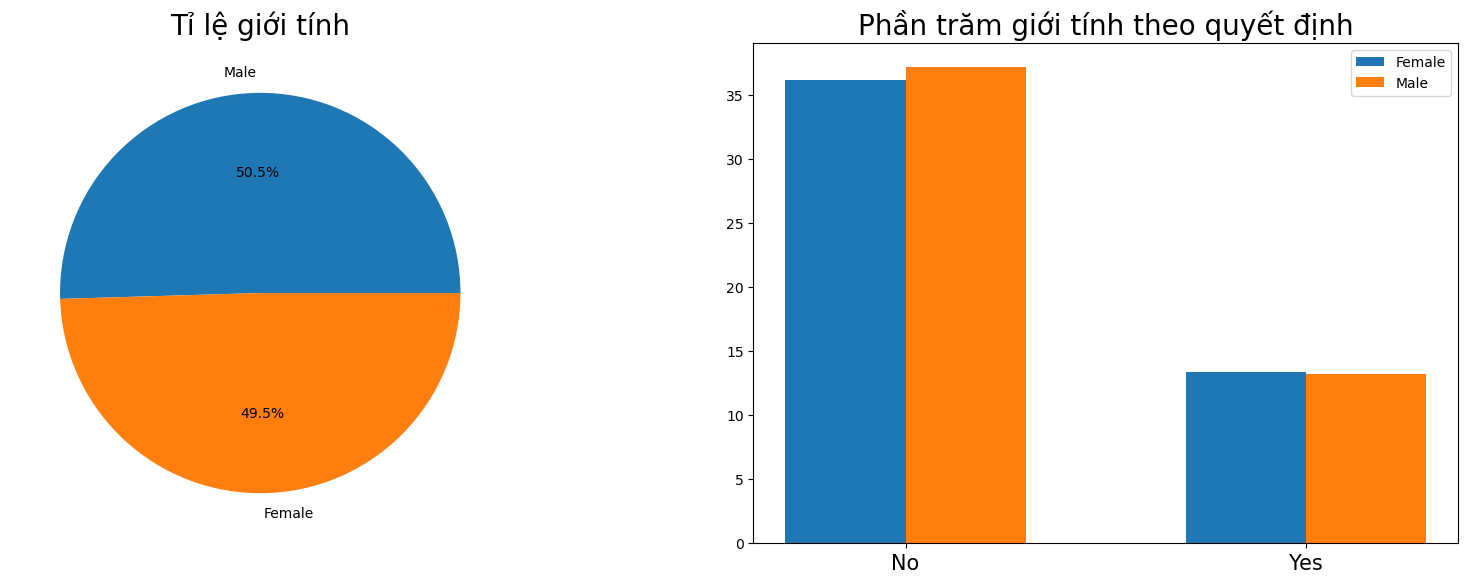

In [14]:
# adding first subplot
width = 0.3

fig= plt.figure(figsize = (20,6.5))

plt.subplot(121)
plt.title("Tỉ lệ giới tính", fontsize = 20)
plt.pie(gender['gender'].value_counts().values, labels = gender['gender'].value_counts().index, autopct= "%1.1f%%")

plt.subplot(122)

plt.title("Phần trăm giới tính theo quyết định", fontsize = 20)

x = np.arange(len(bar1['Churn']))

plt.bar(x - width/2, bar1['counts'], width, label = '0')
plt.bar(x + width/2, bar2['counts'], width, label = '1')
plt.xticks([0,1], bar1['Churn'], fontsize = 15)
plt.legend(["Female", "Male"])
plt.show()


In [15]:
bar.style.background_gradient()

,gender,Churn,counts
0,Female,No,36.177474
1,Female,Yes,13.353242
2,Male,No,37.244027
3,Male,Yes,13.225256


tỉ lệ giới tính không chênh lệch với nhau nhiều. trong đó có khoảng trên 35% khách hàng vẫn chọn quyết định ở lại công ty, có khoảng 13% tỷ lệ khách hàng vẫn chọn quyết định là rời công ty

# <center>**Tenure by Churn**</center>

In [16]:
Tenure = df[['tenure', 'Churn']]
Tenure.head()

,tenure,Churn
0,1,No
1,34,No
2,2,Yes
3,45,No
4,2,Yes


In [17]:
Tenure = Tenure.groupby(['tenure', 'Churn'])['Churn'].count()


In [18]:
Tenure = pd.DataFrame(Tenure)


In [19]:
Tenure = Tenure.rename(columns = {'Churn': 'counts'})

In [20]:
Tenure = Tenure.reset_index()

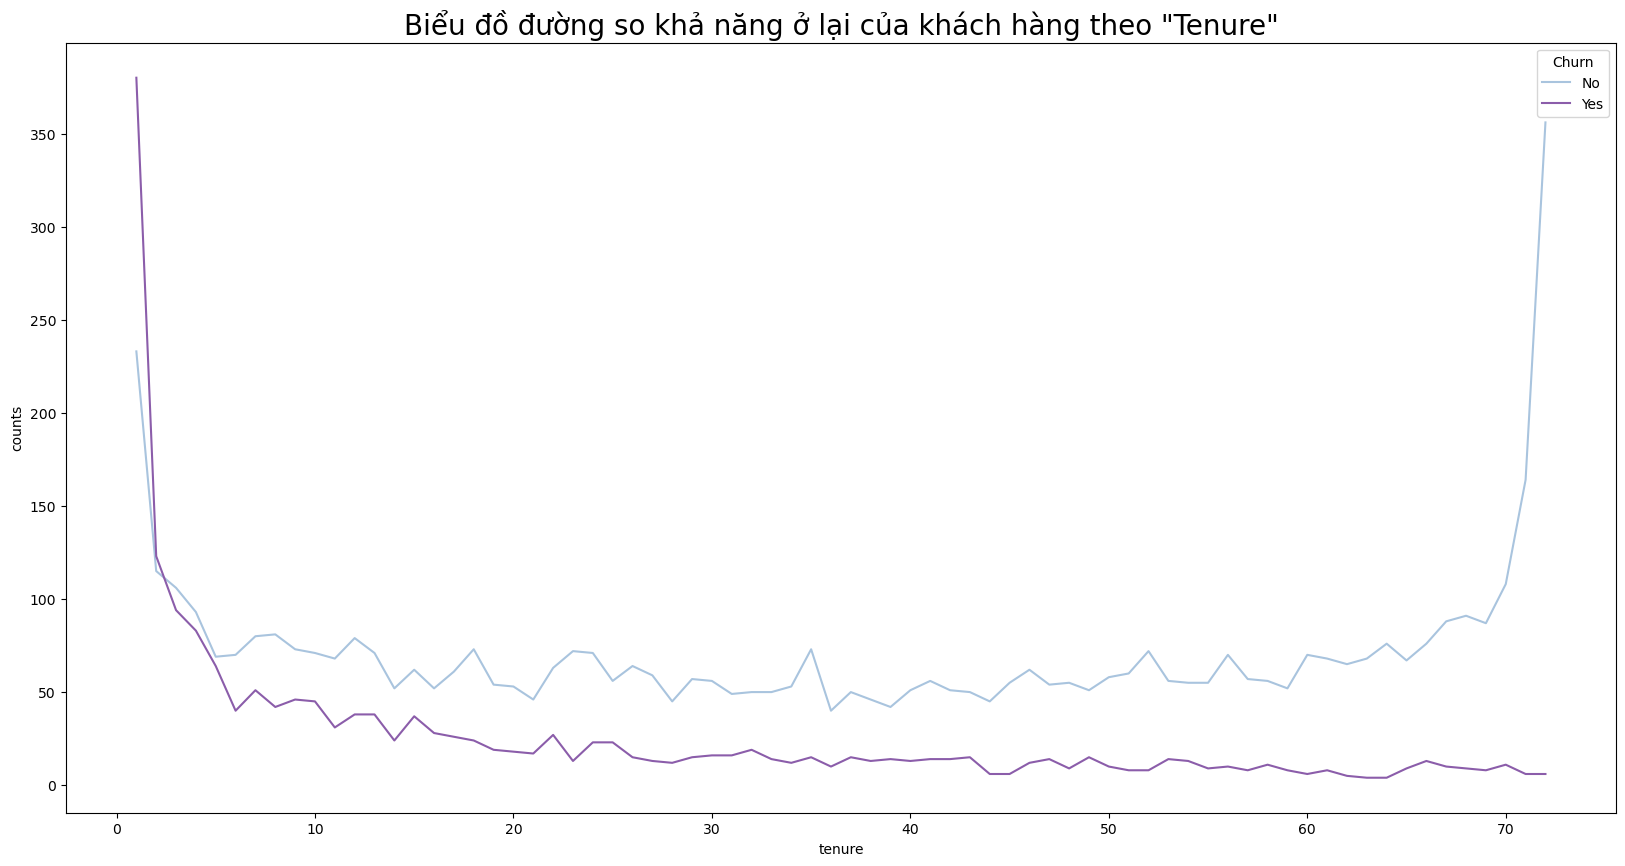

In [21]:
plt.figure(figsize = (20,10))
plt.title('Biểu đồ đường so khả năng ở lại của khách hàng theo "Tenure"', fontsize = 20)
sns.lineplot(data = Tenure, x = 'tenure', y = 'counts', hue = 'Churn', palette='BuPu')
plt.show()


ta nhận thấy rằng tỷ lệ ngươi đồng ý rời đi cao rơi vào khoảng 0 đến 5 'tenure', tỷ lệ người ở lại cao rơi vào khoảng tầm lớn hơn 60 tenure

# <center>**SeniorCitizen by Churn**</center>

In [22]:
SeniorCitizen = df[['SeniorCitizen', 'Churn']]
SeniorCitizen.head()

,SeniorCitizen,Churn
0,0,No
1,0,No
2,0,Yes
3,0,No
4,0,Yes


In [23]:
barSeniorCitizen = SeniorCitizen.groupby(['SeniorCitizen', 'Churn'])['Churn'].count()
barSeniorCitizen = pd.DataFrame(barSeniorCitizen)
barSeniorCitizen = barSeniorCitizen.rename(columns={'Churn': 'counts'})

In [24]:
barSeniorCitizen = barSeniorCitizen.reset_index()
barSeniorCitizen

,SeniorCitizen,Churn,counts
0,0,No,4497
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


In [25]:
barSeniorCitizen['counts'] = barSeniorCitizen['counts']*100/barSeniorCitizen['counts'].sum()


In [26]:
barSeniorCitizen = barSeniorCitizen.reset_index()

In [27]:
barSeniorCitizen1 = barSeniorCitizen.loc[barSeniorCitizen['SeniorCitizen'] == 0, :]
barSeniorCitizen2 = barSeniorCitizen.loc[barSeniorCitizen['SeniorCitizen'] == 1, :]
barSeniorCitizen1['counts'] = barSeniorCitizen1['counts']*100/barSeniorCitizen['counts'].sum()
barSeniorCitizen2['counts'] = barSeniorCitizen2['counts']*100/barSeniorCitizen['counts'].sum()

C:\Users\84936\AppData\Local\Temp\ipykernel_9268\2695305116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barSeniorCitizen1['counts'] = barSeniorCitizen1['counts']*100/barSeniorCitizen['counts'].sum()
C:\Users\84936\AppData\Local\Temp\ipykernel_9268\2695305116.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barSeniorCitizen2['counts'] = barSeniorCitizen2['counts']*100/barSeniorCitizen['counts'].sum()


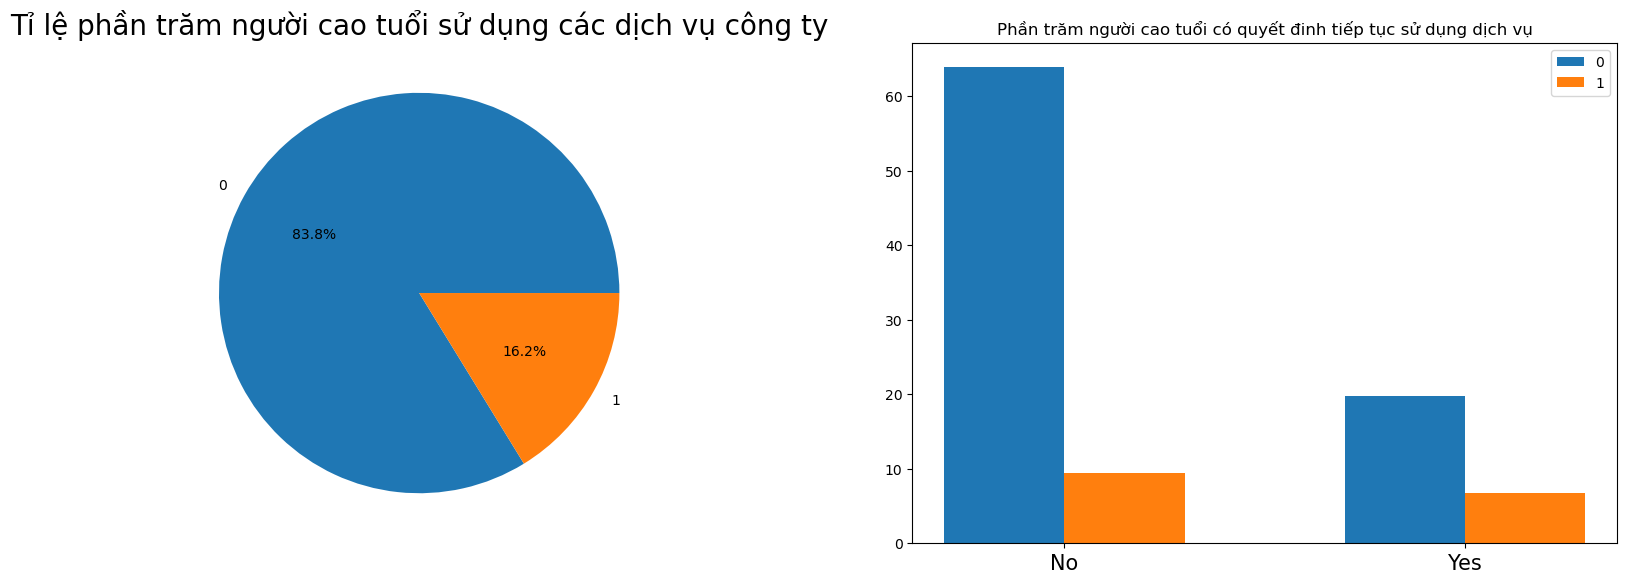

In [28]:
# adding first subplot
width = 0.3

fig= plt.figure(figsize = (20,6.5))

plt.subplot(121)
plt.title("Tỉ lệ phần trăm người cao tuổi sử dụng các dịch vụ công ty", fontsize = 20)
plt.pie(df['SeniorCitizen'].value_counts().values, labels = df['SeniorCitizen'].value_counts().index, autopct= "%1.1f%%")

plt.subplot(122)

plt.title("Phần trăm người cao tuổi có quyết đinh tiếp tục sử dụng dịch vụ")
x = np.arange(len(barSeniorCitizen1['Churn']))

plt.bar(x - width/2, barSeniorCitizen1['counts'], width, label = '0')
plt.bar(x + width/2, barSeniorCitizen2['counts'], width, label = '1')
plt.xticks([0,1], barSeniorCitizen1['Churn'], fontsize = 15)
plt.legend(["0", "1"])
plt.show()


In [29]:
barSeniorCitizen.style.background_gradient()

,index,SeniorCitizen,Churn,counts
0,0,0,No,63.950512
1,1,0,Yes,19.809443
2,2,1,No,9.470990
3,3,1,Yes,6.769056


Ta nhận xét có khoảng 83,8% người trẻ sử dụng các dịch vụ công nghệ của công ty. Tỷ lệ người trẻ tuổi quyết định ở lại sử dụng dịch vụ trên 63%.
=> <b> Điều này ta có thể suy đoán có những người sử dụng dịch vụ của công ty là giới trẻ và những người trẻ này có thể tiếp tục sử dụng dịch của công ty</b>

# <center>**Partner by Churn**</center>

In [30]:
partner = df[['Partner', 'Churn']]
partner.head()

,Partner,Churn
0,Yes,No
1,No,No
2,No,Yes
3,No,No
4,No,Yes


In [31]:
barpartner = partner.groupby(['Partner', 'Churn'])['Churn'].count()
barpartner = pd.DataFrame(barpartner)
barpartner = barpartner.rename(columns={'Churn': 'counts'})

In [32]:
barpartner = barpartner.reset_index()

In [33]:
barpartner1 = barpartner.loc[barpartner['Partner'] == 'Yes', :]
barpartner2 = barpartner.loc[barpartner['Partner'] == 'No', :]
barpartner1['counts'] = barpartner1['counts']*100/barpartner1['counts'].sum()
barpartner2['counts'] = barpartner2['counts']*100/barpartner2['counts'].sum()


C:\Users\84936\AppData\Local\Temp\ipykernel_9268\2712247067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barpartner1['counts'] = barpartner1['counts']*100/barpartner1['counts'].sum()
C:\Users\84936\AppData\Local\Temp\ipykernel_9268\2712247067.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barpartner2['counts'] = barpartner2['counts']*100/barpartner2['counts'].sum()


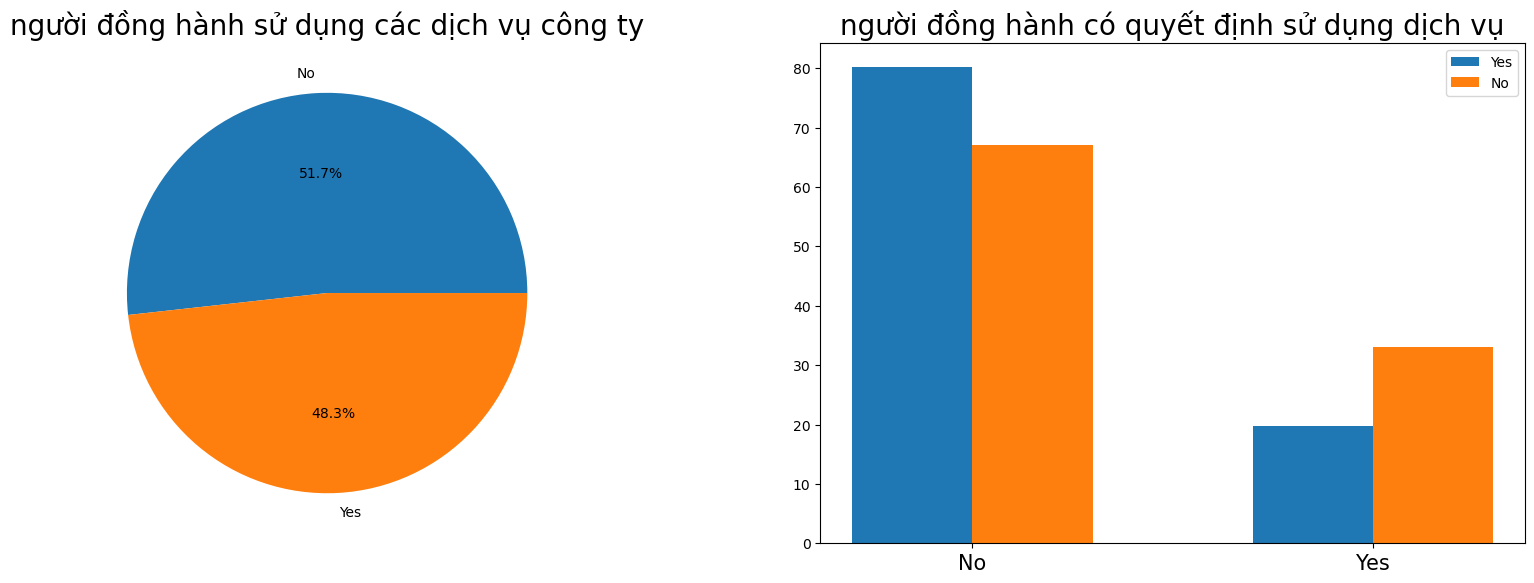

In [34]:
# adding first subplot
width = 0.3

fig= plt.figure(figsize = (20,6.5))

plt.subplot(121)
plt.title("người đồng hành sử dụng các dịch vụ công ty", fontsize = 20)
plt.pie(df['Partner'].value_counts().values, labels = df['Partner'].value_counts().index, autopct= "%1.1f%%")

plt.subplot(122)
x = np.arange(len(barpartner1['Churn']))
plt.title("người đồng hành có quyết định sử dụng dịch vụ", fontsize = 20)
plt.bar(x - width/2, barpartner1['counts'], width, label = '0')
plt.bar(x + width/2, barpartner2['counts'], width, label = '1')
plt.xticks([0,1], barpartner1['Churn'], fontsize = 15)
plt.legend(["Yes", "No"])
plt.show()

Ta nhận thấy có khoảng 48,3% là khách hàng tìm năng sử dụng dịch vụ và có khoảng 51,7% khách hàng bình thường sử dụng dịch vụ. </br>
Trong số khách hàng tìm năng thì có gần 80% quyết định tiếp tục sử dụng dịch vụ. Khách hàng bình thường có khoảng dưới 70% tiếp tục sử dụng dịch vụ.

# <center>**Dependents by Churn**</center>

In [35]:
Dependents = df[['Dependents', 'Churn']]
Dependents.head()

,Dependents,Churn
0,No,No
1,No,No
2,No,Yes
3,No,No
4,No,Yes


In [36]:
barDependents = Dependents.groupby(['Dependents', 'Churn'])['Churn'].count()
barDependents = pd.DataFrame(barDependents)
barDependents = barDependents.rename(columns={'Churn': 'counts'})

In [37]:
barDependents = barDependents.reset_index()

In [38]:
barDependents1 = barDependents.loc[barDependents['Dependents'] == 'Yes', :]
barDependents2 = barDependents.loc[barDependents['Dependents'] == 'No', :]
barDependents1['counts'] = barDependents1['counts']*100/barDependents1['counts'].sum()
barDependents2['counts'] = barDependents2['counts']*100/barDependents2['counts'].sum()


C:\Users\84936\AppData\Local\Temp\ipykernel_9268\2567670127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barDependents1['counts'] = barDependents1['counts']*100/barDependents1['counts'].sum()
C:\Users\84936\AppData\Local\Temp\ipykernel_9268\2567670127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barDependents2['counts'] = barDependents2['counts']*100/barDependents2['counts'].sum()


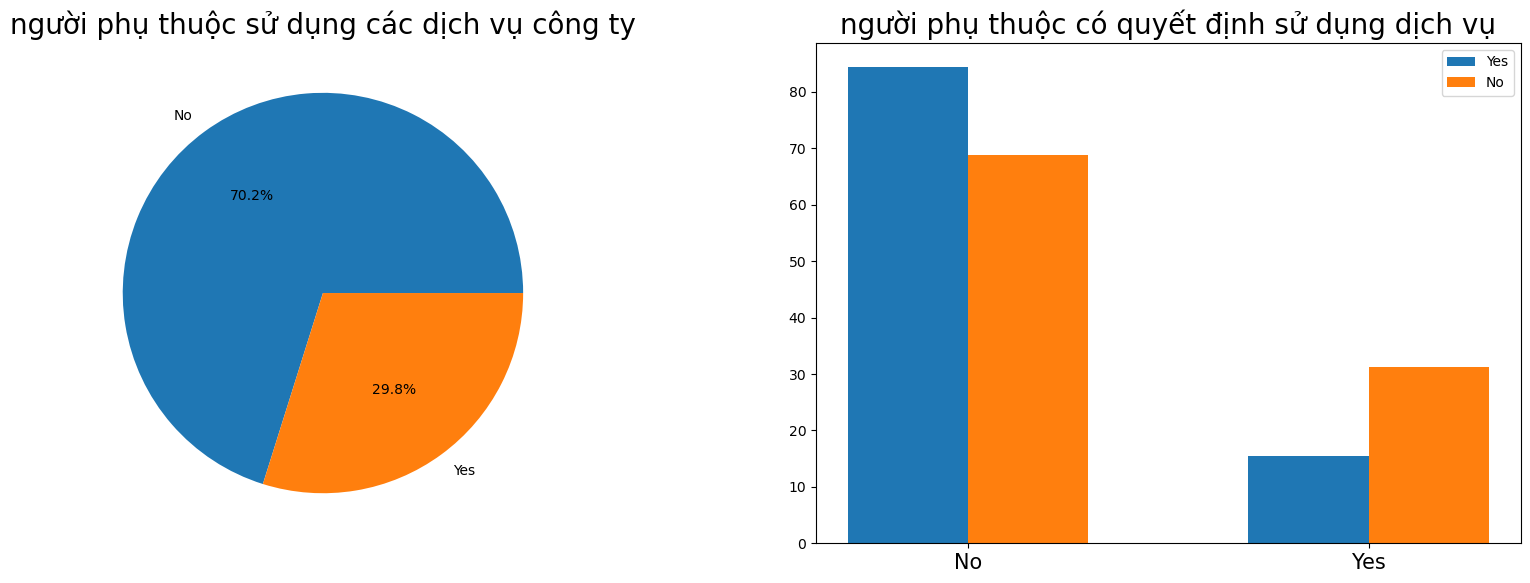

In [39]:
# adding first subplot
width = 0.3

fig= plt.figure(figsize = (20,6.5))

plt.subplot(121)
plt.title("người phụ thuộc sử dụng các dịch vụ công ty", fontsize = 20)
plt.pie(df['Dependents'].value_counts().values, labels = df['Dependents'].value_counts().index, autopct= "%1.1f%%")

plt.subplot(122)
x = np.arange(len(barDependents1['Churn']))
plt.title("người phụ thuộc có quyết định sử dụng dịch vụ", fontsize = 20)
plt.bar(x - width/2, barDependents1['counts'], width, label = 'Yes')
plt.bar(x + width/2, barDependents2['counts'], width, label = 'No')
plt.xticks([0,1], barDependents2['Churn'], fontsize = 15)
plt.legend(["Yes", "No"])
plt.show()

Tỷ lệ khách hàng phụ thuộc vào các dịch vụ chiếm khoảng gần 30% và tỷ lệ tiếp tục sử dụng dịch vụ là khoảng trên 80% <br>
Tỷ lệ khách hàng không phụ thuộc vào các dịch vụ của công ty chiếm khoảng 70.2% tỷ lệ ở tiếp tục sử dụng khoảng gần 70%<br>
=> <b>Điều này cho biết có tỷ lệ người phụ thuộc và các dịch vụ công ty cung cấp thì khả năng rời bỏ khá thấp.</b>

# <center>**phoneSerivce by Churn**</center>

In [40]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [41]:
phoneSerivce = df[['PhoneService', 'MultipleLines', 'Churn']]

In [42]:
phoneSerivce = phoneSerivce.groupby(['PhoneService','MultipleLines', 'Churn'])['Churn'].count()

In [43]:
phoneSerivce = pd.DataFrame(phoneSerivce)
phoneSerivce = phoneSerivce.rename(columns = {'Churn': 'Counts'})

In [44]:
phoneSerivce = phoneSerivce.reset_index()

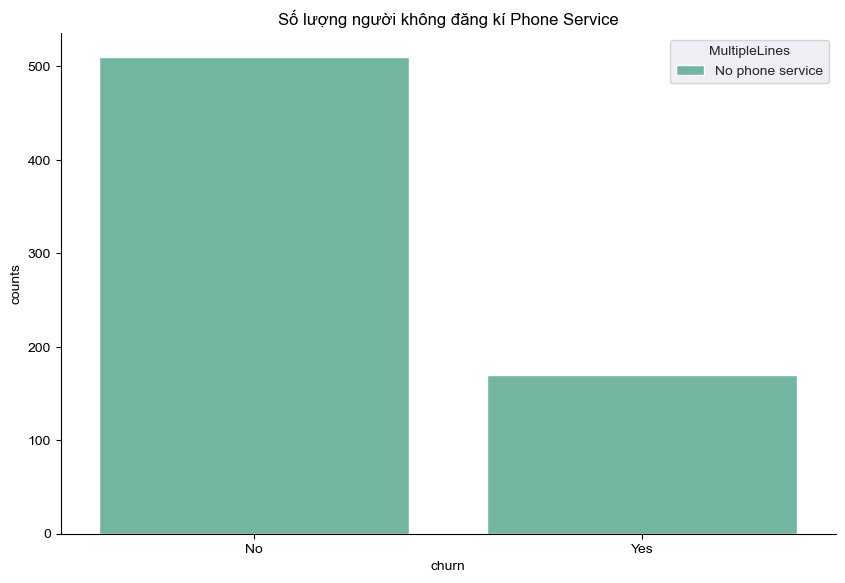

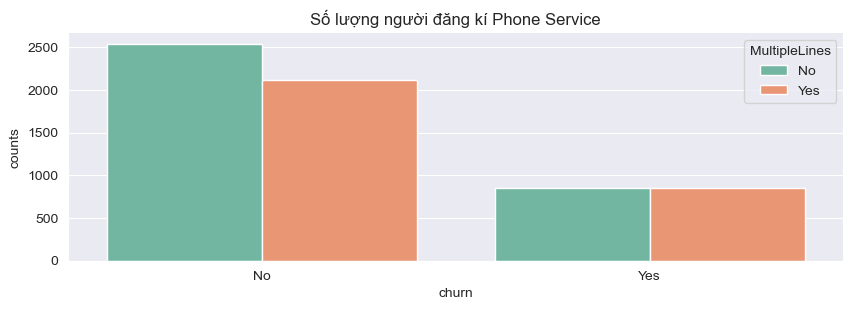

In [45]:
fig = plt.figure(figsize = (10,6.5))
plt.subplot(111)
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.barplot(data=phoneSerivce.loc[phoneSerivce['PhoneService'] == 'No', :], x="Churn", y="Counts", hue = 'MultipleLines')
plt.title('Số lượng người không đăng kí Phone Service')
plt.xlabel('churn')
plt.ylabel('counts')
sns.despine()
plt.show()

fig = plt.figure(figsize = (10,6.5))
plt.subplot(211)
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.barplot(data=phoneSerivce.loc[phoneSerivce['PhoneService'] == 'Yes', :], x="Churn", y="Counts", hue = 'MultipleLines')
plt.title('Số lượng người đăng kí Phone Service')
plt.xlabel('churn')
plt.ylabel('counts')
sns.despine()
plt.show()

In [46]:
phoneSerivce.style.background_gradient()

,PhoneService,MultipleLines,Churn,Counts
0,No,No phone service,No,510
1,No,No phone service,Yes,170
2,Yes,No,No,2536
3,Yes,No,Yes,849
4,Yes,Yes,No,2117
5,Yes,Yes,Yes,850


- có 680 khách hàng không sử dụng dịch vụ phoneService của công ty là rất ít. Đa số các khách hàng này không tiếp tục sử dụng các dịch vụ của công ty nữa
- còn lại là khách hàng sử dụng phoneService, tỷ lệ khách hàng không sử dụng MultipleLines và có sử dụng khả năng tiếp tục sử dụng và không sử dụng là như nhau.<br>

# <center>**InternetService: by Churn**</center>

In [47]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
internetService = df[['InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Churn']]

<AxesSubplot:xlabel='StreamingMovies', ylabel='Count'>

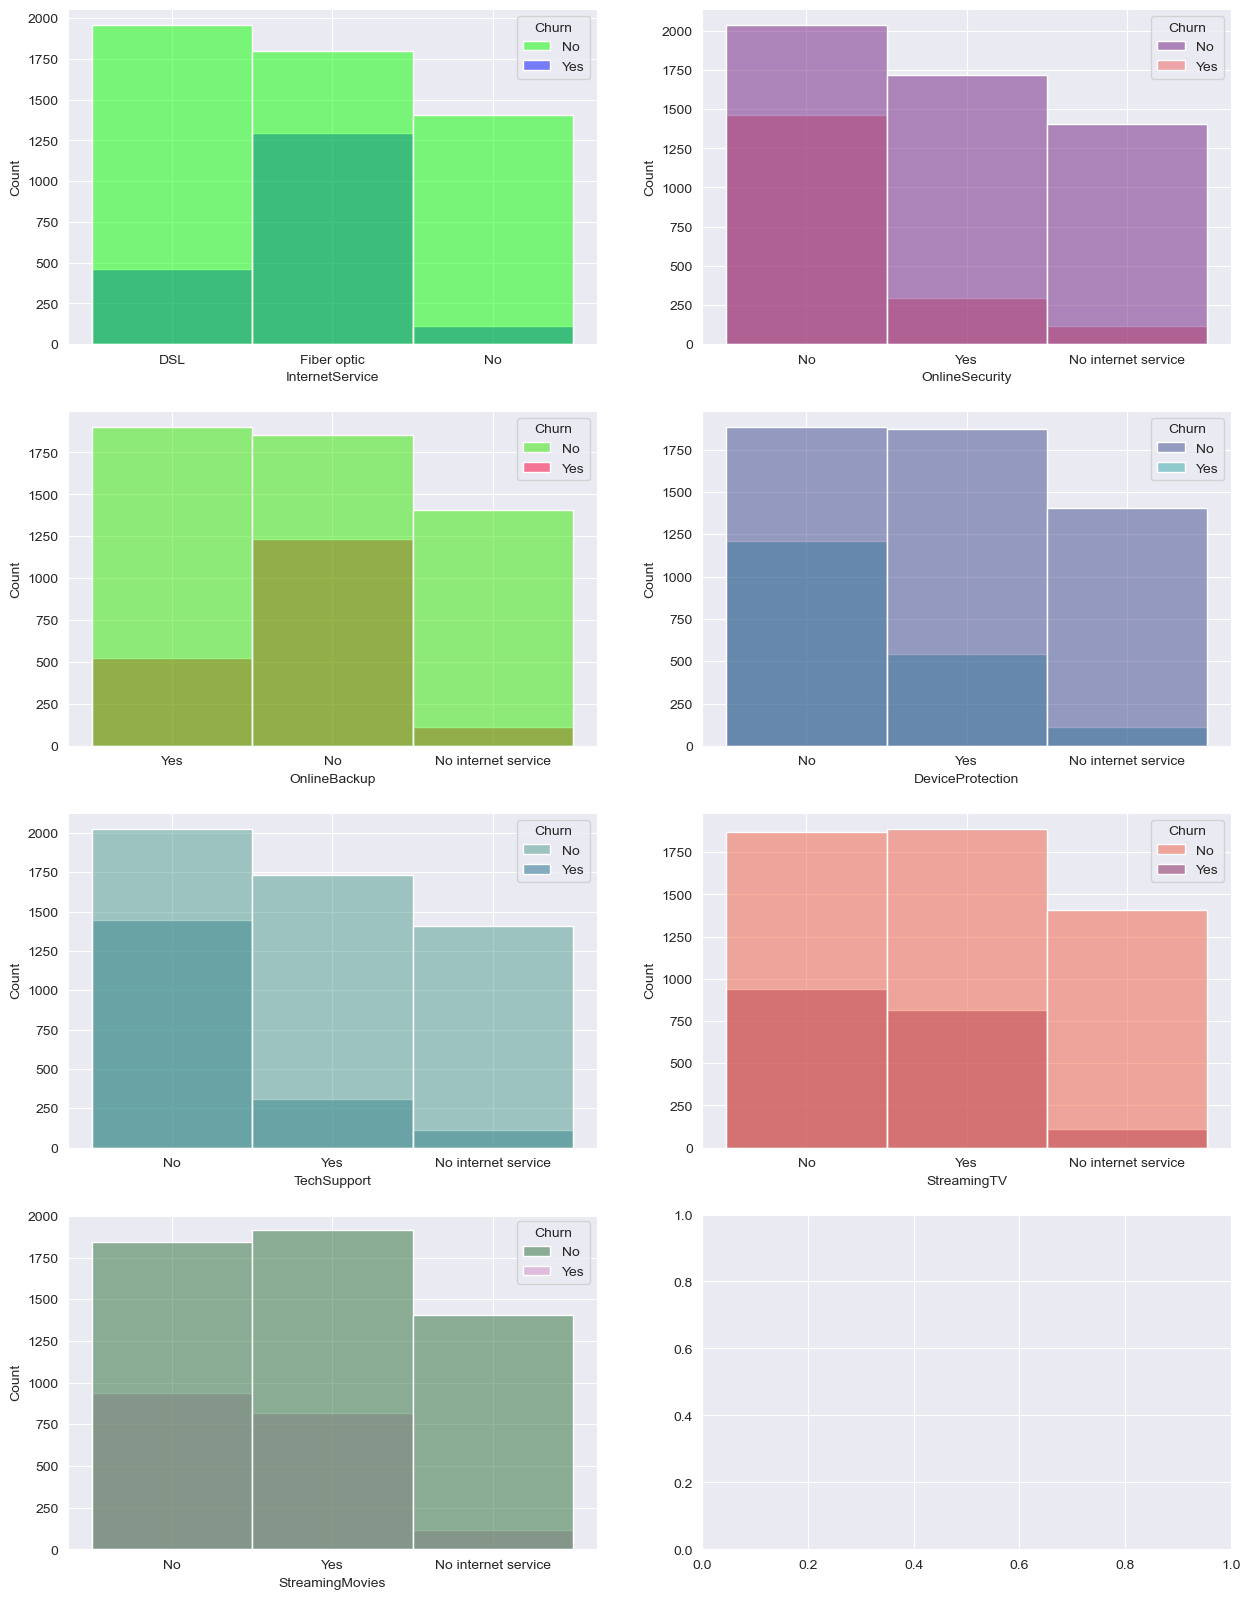

In [49]:
fig, ax = plt.subplots(4, 2,figsize=(15,20))
sns.histplot(data=internetService,x="InternetService",hue='Churn', palette='hsv',ax=ax[0,0])
sns.histplot(data=internetService,x="OnlineSecurity",hue='Churn', palette='magma',ax=ax[0,1])
sns.histplot(data=internetService,x="OnlineBackup",hue='Churn', palette='prism',ax=ax[1,0])
sns.histplot(data=internetService,x='DeviceProtection',hue='Churn', palette='mako',ax=ax[1,1])
sns.histplot(data=internetService,x='TechSupport',hue='Churn', palette='crest',ax=ax[2,0])
sns.histplot(data=internetService,x='StreamingTV',hue='Churn', palette='rocket_r',ax=ax[2,1])
sns.histplot(data=internetService,x='StreamingMovies',hue='Churn', palette='cubehelix',ax=ax[3,0])

# <center>**Payment by Churn**</center>

In [50]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [51]:
payment = df[['Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [52]:
payment

,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,One year,No,Mailed check,56.95,1889.50,No
2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...
7038,One year,Yes,Mailed check,84.80,1990.50,No
7039,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


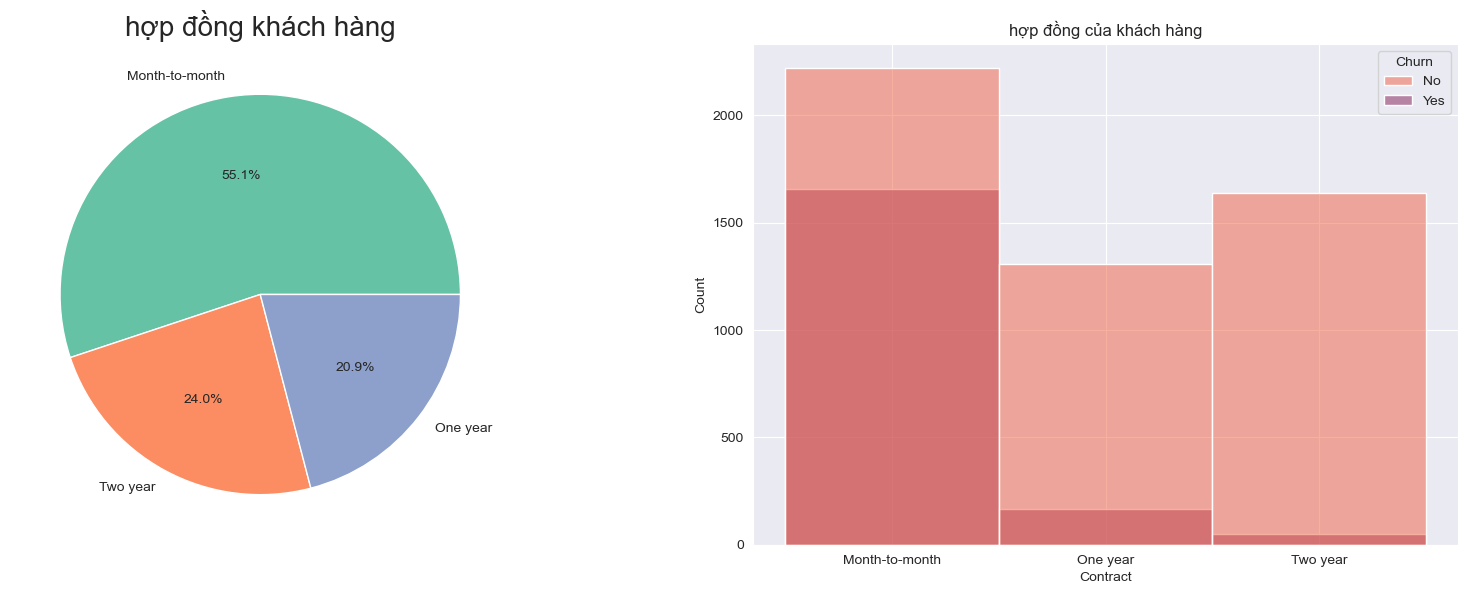

In [53]:
# adding first subplot
width = 0.3

fig= plt.figure(figsize = (20,6.5))

plt.subplot(121)
plt.title("hợp đồng khách hàng", fontsize = 20)
plt.pie(payment['Contract'].value_counts().values, labels = payment['Contract'].value_counts().index, autopct= "%1.1f%%")

plt.subplot(122)
plt.title("hợp đồng của khách hàng")
sns.histplot(data=payment,x='Contract',hue='Churn', palette='rocket_r')
plt.show()


- ta nhận thấy có khoảng 55,1% khách hàng đăng kí hợp đồng "Month-to-month" theo từng tháng và khả năng không tiếp tục sử dụng dịch vụ là khá cao
- trong khi đó khách hàng đăng kí hợp đồng 1 hoặc 2 năm thì khả năng rời đi là rất thấp

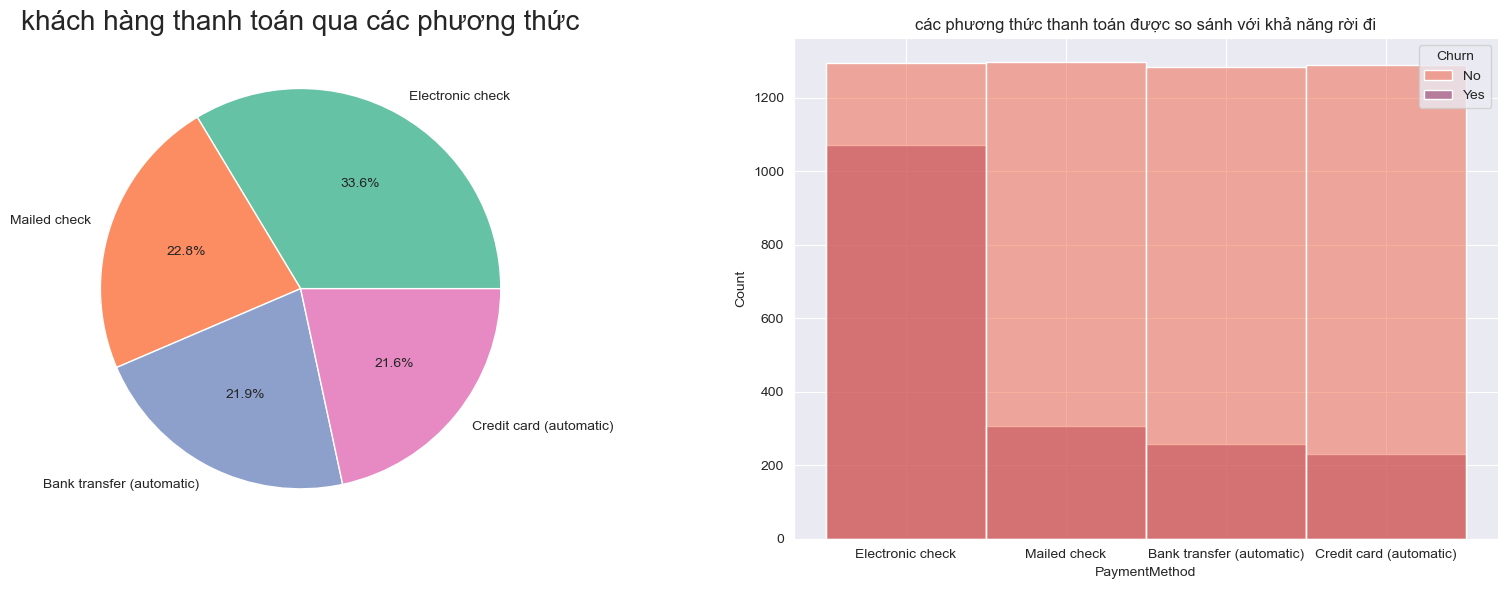

In [54]:
# adding first subplot
width = 0.3

fig= plt.figure(figsize = (20,6.5))

plt.subplot(121)
plt.title("khách hàng thanh toán qua các phương thức", fontsize = 20)
plt.pie(payment['PaymentMethod'].value_counts().values, labels = payment['PaymentMethod'].value_counts().index, autopct= "%1.1f%%")

plt.subplot(122)
plt.title("các phương thức thanh toán được so sánh với khả năng rời đi")
sns.histplot(data=payment,x='PaymentMethod',hue='Churn', palette='rocket_r')
plt.show()

- Ta nhận thấy phương thức thanh toán qua Credit card có tỉ lệ chiếm 21.6% trong phương thức thanh toán. Những khách hàng tiếp tục sử dụng dịch vụ rất cao

# Building forecats model

In [55]:
df = df.drop('customerID', axis=1)

In [56]:
df1 = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']]
dataHeap = df1.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1)
obj = dataHeap.select_dtypes("object").columns

In [57]:
def convertStringToNumber(name, df, data):
    for n in name:
        x = df[n].unique()
        for i in range(len(x)):
            data[n] = data[n].replace(to_replace=x[i], value=i)

In [58]:

convertStringToNumber(obj, dataHeap, df1)

C:\Users\84936\AppData\Local\Temp\ipykernel_9268\3390505452.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


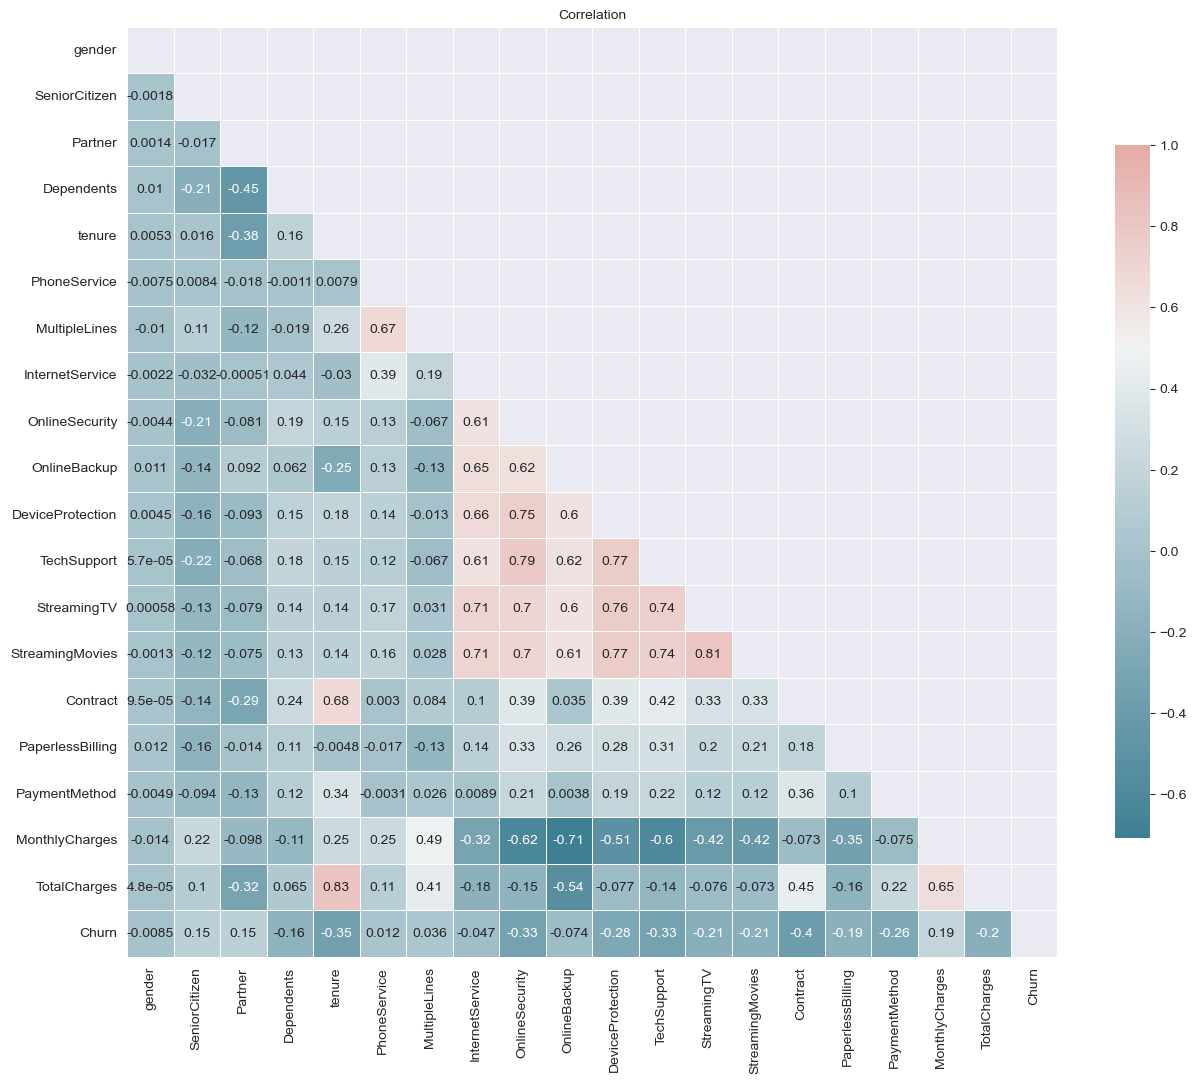

In [59]:
corr = df1.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(220, 15, as_cmap=True)
#Drawing heatmap
sns.heatmap(corr, 
            mask=mask,
            cmap=cmap, 
            vmax=1, 
            center=0.5, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .6},
            annot=True
           )
plt.title("Correlation", fontsize =10)
plt.show()

In [60]:
x = df1.drop("Churn", axis = 1)
y = df1['Churn']

In [61]:
rfe = RFE(estimator= DecisionTreeClassifier(), n_features_to_select= 5)

In [62]:
rfe.fit(x,y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [63]:
for i, col in zip(range(x.shape[1]), x.columns):
  print(f"{col} selected = {rfe.support_[i]} rank = {rfe.ranking_[i]}")

gender selected = False rank = 3
SeniorCitizen selected = False rank = 10
Partner selected = False rank = 5
Dependents selected = False rank = 7
tenure selected = True rank = 1
PhoneService selected = False rank = 15
MultipleLines selected = False rank = 8
InternetService selected = False rank = 4
OnlineSecurity selected = True rank = 1
OnlineBackup selected = False rank = 12
DeviceProtection selected = False rank = 11
TechSupport selected = False rank = 9
StreamingTV selected = False rank = 14
StreamingMovies selected = False rank = 13
Contract selected = True rank = 1
PaperlessBilling selected = False rank = 6
PaymentMethod selected = False rank = 2
MonthlyCharges selected = True rank = 1
TotalCharges selected = True rank = 1


In [64]:
X = df1[['TotalCharges', 'MonthlyCharges', 'OnlineSecurity', 'tenure', 'Contract']]
y = df1['Churn']

In [65]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape )

(5625, 5) (1407, 5) (5625,) (1407,)


In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier(n_neighbors= 15)

In [68]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [69]:
pred_knn = knn.predict(X_test)

c:\Users\84936\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [70]:
print(accuracy_score(y_test, pred_knn))

0.7882018479033405


              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1033
           1       0.66      0.43      0.52       374

    accuracy                           0.79      1407
   macro avg       0.74      0.67      0.69      1407
weighted avg       0.77      0.79      0.77      1407



<AxesSubplot:>

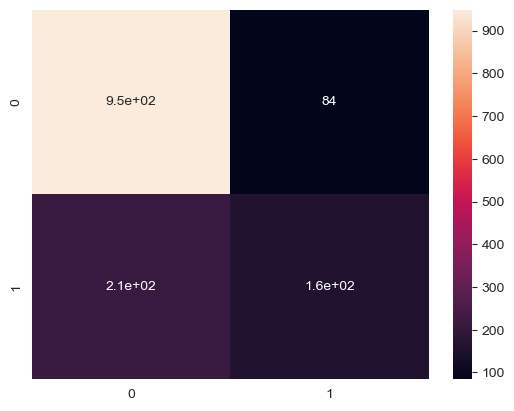

In [71]:
print(classification_report(y_test,pred_knn))

confusion_knn=confusion_matrix(y_test,pred_knn)
sns.heatmap(confusion_knn,annot=True)